### Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_world = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

df_world = df_world.groupby('Country/Region').sum()
df_world = df_world.drop(columns=['Lat', 'Long'])
df_world.columns = pd.to_datetime(df_world.columns)

df_world.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29,2021-05-30,2021-05-31,2021-06-01,2021-06-02,2021-06-03,2021-06-04,2021-06-05,2021-06-06,2021-06-07,2021-06-08,2021-06-09,2021-06-10,2021-06-11,2021-06-12,2021-06-13,2021-06-14,2021-06-15,2021-06-16,2021-06-17,2021-06-18,2021-06-19,2021-06-20,2021-06-21,2021-06-22,2021-06-23,2021-06-24,2021-06-25,2021-06-26,2021-06-27,2021-06-28,2021-06-29,2021-06-30,2021-07-01
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740,89861,91458,93272,93288,96531,98734,98734,98734,103902,105749,107957,109532,111592,111592,111592,115751,117158,118659,120216
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449,132459,132461,132469,132476,132481,132484,132488,132490,132490,132496,132497,132499,132506,132509,132512,132513,132514,132521,132523
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070,133388,133742,134115,134458,134840,135219,135586,135821,136294,136679,137049,137403,137772,138113,138465,138840,139229,139626,140075
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826,13828,13836,13839,13842,13842,13842,13864,13864,13873,13877,13882,13882,13882,13882,13900,13911,13918
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600,36705,36790,36921,37094,37289,37467,37604,37678,37748,37874,38002,38091,38371,38528,38556,38613,38682,38849,38965


### Cumulative to Daily transformation

In [3]:
df_world = df_world - df_world.shift(1, fill_value=0, axis=1)

### 7 Days Moving Average

In [4]:
df_world = df_world.rolling(window=7, axis=1).mean()
df_world = df_world.iloc[:, 7:]
df_world = df_world.astype('int')

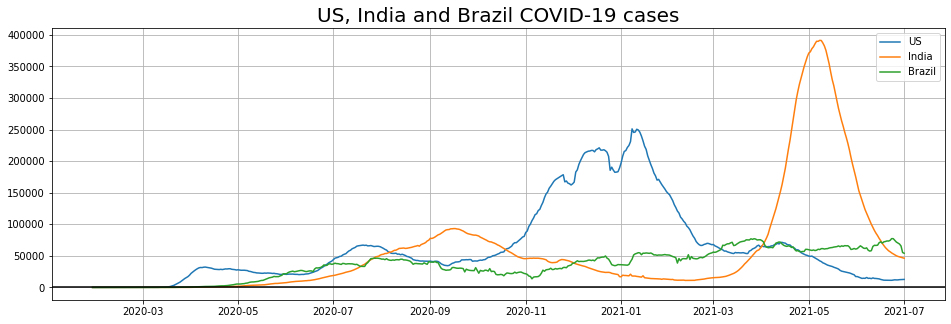

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5))

countries = ['US', 'India', 'Brazil']

ax.set_title('US, India and Brazil COVID-19 cases', fontsize=20)

for country in countries:
  ax.plot(df_world.loc[country], label=country)

ax.legend()
ax.axhline(0, color='black')
ax.grid()

plt.show()

### Top n Countries Bar Chart

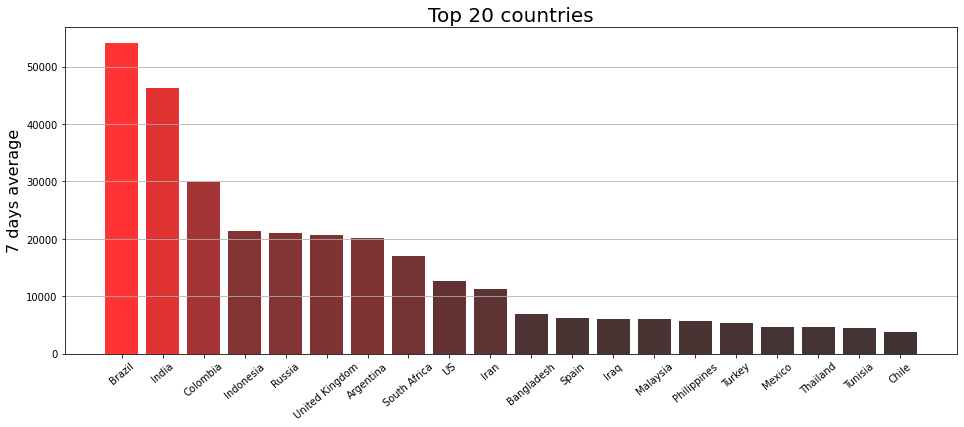

In [6]:
n = 20
date = pd.to_datetime('2021-07-01')

countries = df_world.loc[:, date].nlargest(n)

fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.set_title(f'Top {n} countries', fontsize=20)
ax.bar(countries.index, countries.values, color=[(val / countries.values[0], 0, 0, 0.8) for val in countries.values])
ax.set_ylabel('7 days average', fontsize=16)

ax.yaxis.grid()

plt.xticks(rotation='40')
plt.show()

### Top n Countries Pie Chart

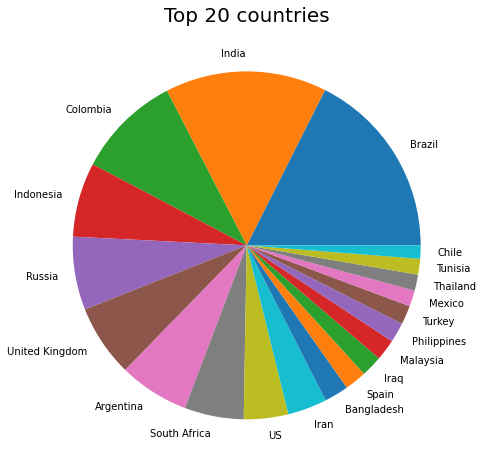

In [7]:
n = 20
date = pd.to_datetime('2021-07-01')

countries = df_world.loc[:, date].nlargest(n)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.set_title(f'Top {n} countries', fontsize=20)
ax.pie(countries.values, labels=countries.index)

plt.show()

### Choropleth Map Animation

In [8]:
import plotly.express as px

In [9]:
iso_codes = pd.read_csv('https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv')
iso_codes = iso_codes.set_index('Country')
iso_codes = iso_codes['Alpha-3 code']
iso_codes = iso_codes.replace(regex={'\"': '', ' ': ''})

iso_codes['Iran'] = 'IRN'
iso_codes['US'] = 'USA'
iso_codes['Syria'] = 'SYR'
iso_codes['Congo (Kinshasa)'] = 'COD'
iso_codes['Korea, South'] = 'KOR'
iso_codes['Taiwan*'] = 'TWN'
iso_codes['Congo (Brazzaville)'] = 'COG'
iso_codes['Laos'] = 'LAO'
iso_codes["Cote d'Ivoire"] = 'CIV'
iso_codes['Czechia'] = 'CZE'
iso_codes['Tanzania'] = 'TZA'

In [10]:
df_long = df_world.copy()

date_list = list(df_long.columns)

df_long['country'] = df_long.index
df_long['iso_code'] = df_long['country'].apply(lambda x: iso_codes.loc[x] if x in iso_codes.index else None)

df_long = pd.melt(df_long, id_vars=['country', 'iso_code'], value_vars=date_list)
df_long = df_long.rename(columns={"variable": "date", "value": "case_count"})

df_long['date'] = df_long['date'].astype(str)

df_long.head()

,country,iso_code,date,case_count
0,Afghanistan,AFG,2020-01-29,0
1,Albania,ALB,2020-01-29,0
2,Algeria,DZA,2020-01-29,0
3,Andorra,AND,2020-01-29,0
4,Angola,AGO,2020-01-29,0


In [11]:
fig = px.choropleth(df_long,                          
                     locations="iso_code", 
                     color="case_count",
                     hover_name="country",
                     animation_frame='date',
                     projection="natural earth",
                     color_continuous_scale = "Peach",
                     range_color=[0, 5000]
                     )

fig.show()
# fig.write_html("case_map.html")   If you want to write the map as a html page

Output hidden; open in https://colab.research.google.com to view.